datetime
sortolas hogy latszodjon milyen idointervallum az adat +head,tail
utana hogy milyen weather a realis
filterezes: ahol min > max
ahol trip station name rossz
kitolteni a hianyzo zip code-ot station name alapjan
atteni stringrol int-re, hogy joinolni lehessen
outlierezes (boxplot)
trip duration

#### Filtering

In [140]:
df = pd.DataFrame({'a':[1,1,1,2,2,3,4,5],
                  'b':[10,10,11,20,0,0,40,50],
                  'c':['apple','apple','plum','pear','plum','apple','apple','apple']})
df

,a,b,c
0,1,10,apple
1,1,10,apple
2,1,11,plum
3,2,20,pear
4,2,0,plum
5,3,0,apple
6,4,40,apple
7,5,50,apple


In [141]:
df['a']<3

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7    False
Name: a, dtype: bool

In [142]:
df[df['a']<3]

,a,b,c
0,1,10,apple
1,1,10,apple
2,1,11,plum
3,2,20,pear
4,2,0,plum


In [153]:
only_apple = df[df['c']=='apple']
only_apple

,a,b,c
0,1,10,apple
1,1,10,apple
5,3,0,apple
6,4,40,apple
7,5,50,apple


In [145]:
df[(df['b']==10) & (df['c']=='apple')]

,a,b,c
0,1,10,apple
1,1,10,apple


In [148]:
df[df['a']<df['b']]

,a,b,c
0,1,10,apple
1,1,10,apple
2,1,11,plum
3,2,20,pear
6,4,40,apple
7,5,50,apple


#### Set

In [172]:
set_a = {'apple','plum','plum','pear'}
set_a

{'apple', 'pear', 'plum'}

In [174]:
US_spies = {'John','Anton','Brad','Dimitrij'}
russian_spies = {'Pavlov', 'Mikhail', 'Dimitrij','John', 'Alexander'}

In [175]:
loyal_US_spies = US_spies.difference(russian_spies)
loyal_US_spies

{'Anton', 'Brad'}

In [176]:
double_agents = US_spies.intersection(russian_spies)
double_agents

{'Dimitrij', 'John'}

In [177]:
all_spies = US_spies.union(russian_spies)
all_spies

{'Alexander', 'Anton', 'Brad', 'Dimitrij', 'John', 'Mikhail', 'Pavlov'}

In [190]:
us_df = pd.DataFrame({'spies':['Anton', 'Anton', 'Brad', 'Brad', 'Brad','Dimitrij', 'Dimitrij', 'John', 'John'],
                     'contacted':pd.date_range(start='1/1/1960', end='1/9/1960')})
russia_df = pd.DataFrame({'spies':['Pavlov', 'Mikhail', 'Dimitrij','John', 'Alexander', 'Pavlov', 'Mikhail', 'Dimitrij','John', 'Alexander', 'Pavlov', 'Mikhail', 'Dimitrij','John', 'Alexander'],
                     'contacted':pd.date_range(start='1/1/1960', end='1/15/1960')})

In [187]:
us_df

,contacted,spies
0,2018-01-01,Anton
1,2018-01-02,Anton
2,2018-01-03,Brad
3,2018-01-04,Brad
4,2018-01-05,Brad
5,2018-01-06,Dimitrij
6,2018-01-07,Dimitrij
7,2018-01-08,John
8,2018-01-09,John


In [191]:
russia_df

,contacted,spies
0,1960-01-01,Pavlov
1,1960-01-02,Mikhail
2,1960-01-03,Dimitrij
3,1960-01-04,John
4,1960-01-05,Alexander
5,1960-01-06,Pavlov
6,1960-01-07,Mikhail
7,1960-01-08,Dimitrij
8,1960-01-09,John
9,1960-01-10,Alexander


In [193]:
us_df['spies'].tolist()

['Anton',
 'Anton',
 'Brad',
 'Brad',
 'Brad',
 'Dimitrij',
 'Dimitrij',
 'John',
 'John']

In [194]:
set(us_df['spies'].tolist())

{'Anton', 'Brad', 'Dimitrij', 'John'}

In [197]:
double_agents = set(us_df['spies'].tolist()).intersection(set(russia_df['spies'].tolist()))
double_agents

{'Dimitrij', 'John'}

## Preparing for joining the dataframes

For joining weather data to trip data, we'll have to know the landmark of each trip. For that we'll use the zip code information from the station dataframe. We also have to use the date, which first needs to be transformed. <br>
Let's start with that!


### 1 - exercise
Load the datasets into pandas dataframes called trip, weather and station.<br><br>
Let's start with the date columns! <br>
In the trip dataframe create two new columns called 'start_datetime' and 'end_datetime'. These should contain the values from column 'Start Date' and 'End date' converted into datetime. <br><br>
In the weather dataframe create a new column called 'datetime' similarly from the 'Date' column.<br><br>
Display the datatypes of these columns to check the difference between the old and the new format.

In [1]:
### Your code here
import pandas as pd

weather = pd.read_csv('weather_filled.csv')
trip = pd.read_csv('trip_filled.csv')
station = pd.read_csv('station.csv')

trip['start_date'] = pd.to_datetime(trip['Start Date'], format='%m/%d/%Y %H:%M')
trip['end_date'] = pd.to_datetime(trip['End Date'], format='%m/%d/%Y %H:%M')
weather['datetime'] = pd.to_datetime(weather['Date'], format='%m/%d/%Y')

### 1 - check yourself

In [2]:
if (trip['Start Date'] != trip['start_date'].dt.strftime('%-m/%-d/%Y %-H:%M')).sum() == 0:
    print('start_date column is successfully converted')
else:
    print('start_date column is NOT successfully converted')
if (trip['End Date'] != trip['end_date'].dt.strftime('%-m/%-d/%Y %-H:%M')).sum() == 0:
    print('end_date column is successfully converted')
else:
    print('end_date column is NOT successfully converted')
if (weather['Date'] != weather['datetime'].dt.strftime('%-m/%-d/%Y')).sum() == 0:
    print('datetime column is successfully converted')   
else:
    print('datetime column is NOT successfully converted')

start_date column is successfully converted
end_date column is successfully converted
datetime column is successfully converted


### 2 - exercise

Now, that we can use the date values in the weather and the trip dataframe, let's check if they cover the same interval! <br>
Create four variable called weather_datetime_min, weather_datetime_max, trip_start_date_min, trip_start_date_max, trip_end_date_min and trip_end_date_max containing the minimum and maximum values from the named columns.<br>
Display them to see if they the two dataframes have the same minimum and maximum date!

In [3]:
weather_datetime_min = weather['datetime'].min()
weather_datetime_max = weather['datetime'].max()
trip_start_date_min = trip['start_date'].min()
trip_start_date_max = trip['start_date'].max()
trip_end_date_min = trip['end_date'].min()
trip_end_date_max = trip['end_date'].max()

### 2 - check yourself

In [4]:
result_dict = {'weather_datetime_min':pd.Timestamp('2013-08-29 00:00:00'),
              'weather_datetime_max':pd.Timestamp('2014-02-28 00:00:00'),
              'trip_start_date_min':pd.Timestamp('2013-08-29 09:08:00'),
              'trip_start_date_max':pd.Timestamp('2023-08-29 14:13:00'),
              'trip_end_date_min':pd.Timestamp('2013-08-29 09:11:00'),
              'trip_end_date_max':pd.Timestamp('2014-03-02 16:52:00')}
for k,v in result_dict.items():
    if eval(k) == v:
        print('{} is correct'.format(k))
    else:
        print('{} is NOT correct'.format(k))

weather_datetime_min is correct
weather_datetime_max is correct
trip_start_date_min is correct
trip_start_date_max is correct
trip_end_date_min is correct
trip_end_date_max is correct


### 3 - exercise

So it looks like that there are some rows with invalid start_date in the trip dataframe. <br>
Let's see, in how many rows is the start_date later than the latest end_date. You can use the trip_end_date_max variable you've created in the previous task. <br>
Save the number of rows into a variable called nb_not_valid_start_date_rows.

In [5]:
nb_not_valid_start_date_rows = len(trip[trip.start_date>trip_end_date_max])

### 3 - check yourself

In [6]:
if nb_not_valid_start_date_rows == 20:
    print('nb_not_valid_start_date_rows is correct')
else:
    print('nb_not_valid_start_date_rows is NOT correct')

nb_not_valid_start_date_rows is correct


### 4 - exercise

As the number of row with invalid start_date is not high, let's just drop them. <br>
Create a new dataframe called trip_valid_start where these rows are dropped.

In [7]:
trip_valid_start = trip[trip.start_date<=trip_end_date_max].copy()

### 4 - check yourself

In [8]:
if len(trip_valid_start) == 143985 and trip_valid_start['start_date'].max()==pd.Timestamp('2014-02-28 23:20:00'):
    print('New dataframe is correct')
else:
    print('Something is not correct with the new dataframe')

New dataframe is correct


### 5 - exercise
In the weather dataframe the datetime refers to a day, while in the trip_valid_start dataframe the dates refer to exact times. <br>
For being able to join, we'll need to create new columns in both dataframes with only the date part of the timestamps. In the trip_valid_start dataframe we'll use the start_date to join on. <br>
In both dataframes create column called date_to_join in which the datetime/start_date column is transformed to datetime.date format! <br>
Using set().intersection and set().difference see how many common and different values are in the date_to_join columns in the two dataframes. Create variables called nb_common and nb_different and save the result into them!

In [9]:
weather['date_to_join'] = weather['datetime'].dt.date
trip_valid_start['date_to_join'] = trip_valid_start['start_date'].dt.date

In [10]:
nb_common = len(set(trip_valid_start.date_to_join.unique()).intersection(set(weather.date_to_join.unique())))
nb_different = len(set(trip_valid_start.date_to_join.tolist()).difference(set(weather.date_to_join.tolist())))

### 5 - check yourself

In [11]:
if nb_common == 184 and nb_different==0:
    print('The date_to_join columns are correct')
else:
    print('Something is not correct')

The date_to_join columns are correct


### 6 -exercise

Let's save the changed dataframes to csv files!

In [12]:
weather.to_csv('/home/esztersomos/Documents/CEU/winter_2019/merging/weather.csv', index=False)

station.to_csv('/home/esztersomos/Documents/CEU/winter_2019/merging/station.csv', index=False)

trip_valid_start.to_csv('/home/esztersomos/Documents/CEU/winter_2019/merging/trip.csv', index=False)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

- ellenorizni a weather dtype-okat
- mi a T a precip-nel ("T" stand for "Trace". This is a small amount of precipitation that will wet a raingage but is less than the 0.01 inch measuring limit.)
- replace T with 0
- astype float
- boxplot
- cserelni: max temp = 0, min temp

In [26]:
weather['Precipitation_In '].replace('T','0', inplace=True)

weather['Precipitation_In '] = weather['Precipitation_In '].astype(float)

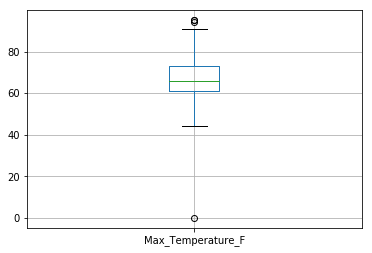

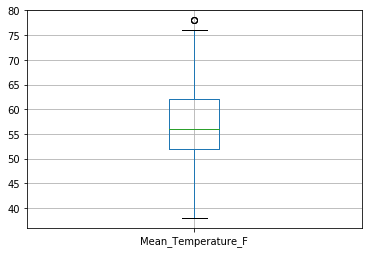

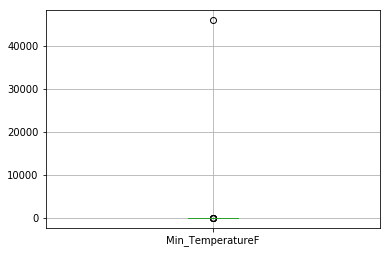

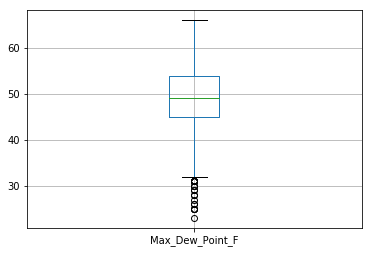

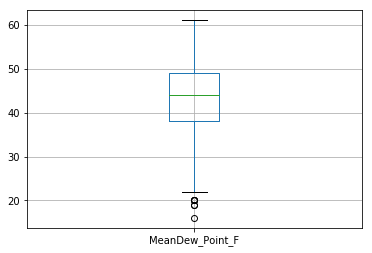

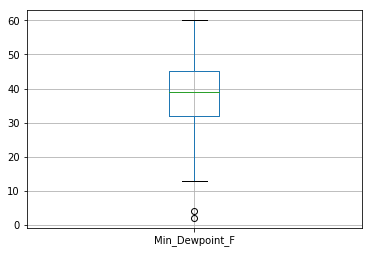

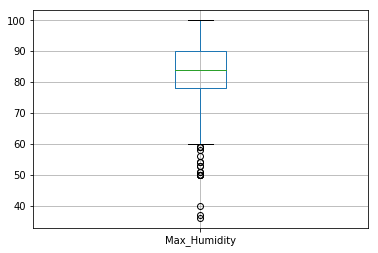

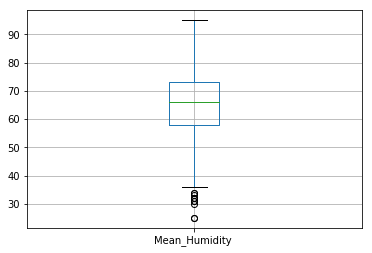

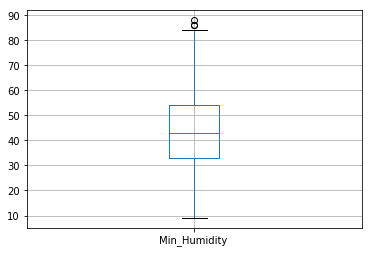

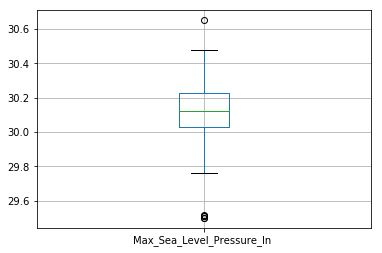

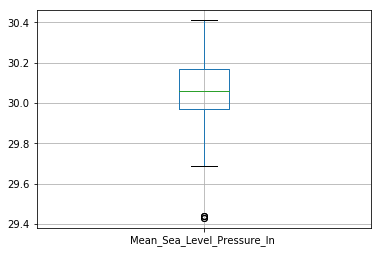

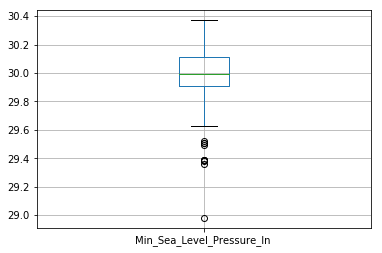

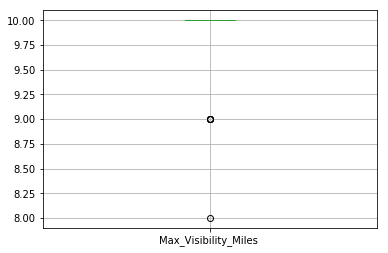

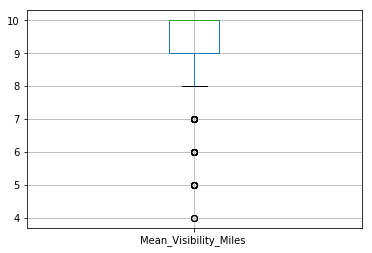

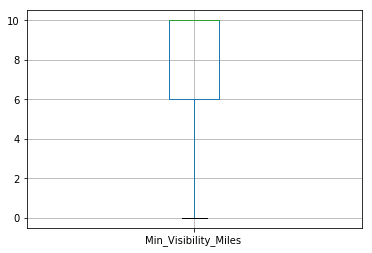

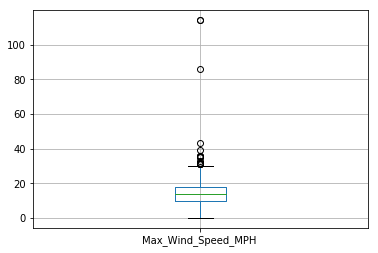

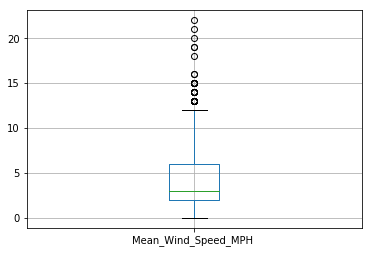

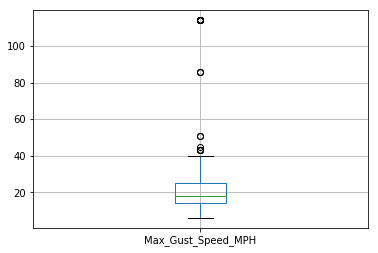

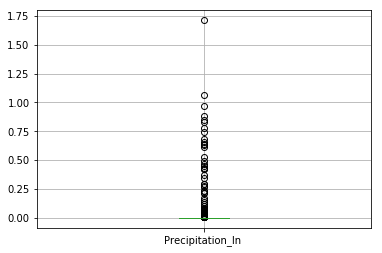

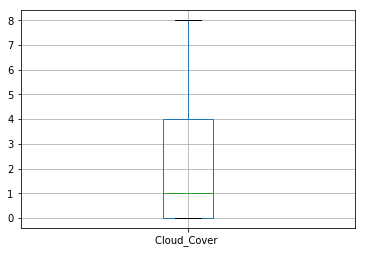

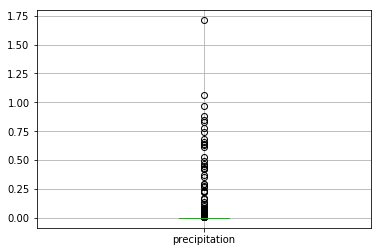

In [27]:
for c in [x for x in weather.columns if x not in ['Date','Events',
       'Wind_Dir_Degrees', 'landmark', 'datetime', 'date_to_join']]:
    weather.boxplot(c)
    plt.show()   

In [20]:
weather.dtypes

Date                                   object
Max_Temperature_F                     float64
Mean_Temperature_F                    float64
Min_TemperatureF                      float64
Max_Dew_Point_F                         int64
MeanDew_Point_F                         int64
Min_Dewpoint_F                          int64
Max_Humidity                            int64
Mean_Humidity                           int64
Min_Humidity                            int64
Max_Sea_Level_Pressure_In             float64
Mean_Sea_Level_Pressure_In            float64
Min_Sea_Level_Pressure_In             float64
Max_Visibility_Miles                    int64
Mean_Visibility_Miles                   int64
Min_Visibility_Miles                    int64
Max_Wind_Speed_MPH                      int64
Mean_Wind_Speed_MPH                     int64
Max_Gust_Speed_MPH                    float64
Precipitation_In                       object
Cloud_Cover                             int64
Events                            